# Investigating Effect of Female Literacy and Autonomy in Society on Child Mortality Rates

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Research Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## Dataset
**Source**: [Gapminder](https://www.gapminder.org/data/) has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. From their list of 500+ indicators, the following indicators related to women literacy and engagement in society peeked my interest:

1. Literacy rate, adult female (% of females ages 15 and above)
    * Adult literacy rate is the percentage of people ages 15 and above who can, with understanding, read and write a short, simple statement on their everyday life
2. Mean years in school (women of reproductive age, 15 to 44)
    * The average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education. 
3. Mean age at 1st marriage of women
    * The average age, in years, of first marriage for women. Women who never married are excluded. Cohabitation is excluded
4. Age 15-64 Female Labor to population (%)
    * For age group 15-64, percentage of female labor to total female population.
5. Under-Five Mortality rate (per 1,000 live births)
    * The probability that children born in a specific year will die before reaching the age of five, if the age-specific mortality rates remain the same.

## Background
Since Gapminder has data on more than 500 indicators ranging in economy, population, health, etc. it is crucial to have a topic of interest prior to choosing indicators. 

I was interested in looking at factors related to females, specifically indicators related to women literacy, autonomy and engagement in society. 

### Factors
The main independent factors explored are adult female literacy rate and mean years in school. The effect of women literacy on mean age at first marriage is explored along with the cumulative effect of all these factors on female labor participation in the economy. 

The final factor explored in Child Mortality Rate and whether women's rights and autonomy are correlated to the mortality rate in a society.

<a id='questions'></a>
## Research Questions 
The aim of this analysis was to research the following questions:
1. Have certain regions of the world been growing in selected metrics better than others?
2. Is female literacy in a country related to the mean age of females at first marriage? 
3. What factors affect the female labor participation in society, specifically, to what extent does female literacy and age at marriage impact female engagement in labor force? 
4. Do factors related to female literacy and autonomy in a society have an effect on the child mortality rate in a country? 

<a id='wrangling'></a>
# Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

Since the data source for each indicator is different, the countries and years measured vary for each dataset. In order to perform comparative analysis between indicators, substantial data wrangling is required to match countries studied for each indicator and the years measured. 

## General Properties 
General exploration of structure of each dataset to determine required steps for cleanup 

In [ ]:
import pandas as pd
import numpy as np
% matplotlib inline

### 1. Mean School Years 

In [ ]:
df_school = pd.read_csv('data/mean_years_school_women.csv')
df_school.info()
df_school.head()

**Observations:**
* Data present for 175 countries for years 1970 - 2009 
* All years contain 175 non-null entries with no missing data for any country for any year

**Next Steps:**
* Extract revelant years data for analysis (determined later)  

### 2. Mean Age at Marriage 

In [ ]:
df_marriage = pd.read_csv('data/marriage_age_females.csv')
df_marriage.info()
df_marriage.head()
df_marriage.count()
# Marriage Age Females
# Horrible data, no complete years. only 2005 has full data

**Observations:**
* Data present for 185 countries for years starting at year 1616 to 2005
* No year contains data for all 185 countries with year 2005 containing highest number of non-null entries (175)

**Next Steps:**
* Due to extreme amount of missing data for most years, all data except for year 2005 will be dropped. 
* Final dataset will contain mean age of first marriage for year 2005 for 175 countries 

### 3. Female Labor Participation

In [ ]:
df_labor = pd.read_csv('data/female_labour_participation_rate.csv')
df_labor.info()
df_labor.head()
# Clean data with no missing values

**Observations:**
* Data present for 189 countries for years 1980 - 2007 
* All years contain 175 non-null entries with no missing data for any country for any year

**Next Steps:**
* Extract revelant years data for analysis (determined later)  

### 4. Child Mortality Rates

In [ ]:
df_cmr = pd.read_csv('data/mortality_rates_under5.csv')
df_cmr.info()
df_cmr.head()
# Good data in later years 

**Observations:**
* Data present for 260 countries for years starting at year 1931 to 2011
* Missing data for years upto 1989. Highest number of non-null entries (195) present for years 1990-2011 

**Next Steps:**
* Columns upto year 1989 will be dropped due to extreme amount of missing data   
* Remove countries with no data present (260-195 = 65 countries) 
* Final dataset will contain child mortality rates for year 1990-2011 for 195 countries 

### 5. Female Literacy Rate 

In [ ]:
df_literacy = pd.read_csv('data/female_literacy_rate.csv')
df_literacy.info()
df_literacy.head()
# Lots of missing values, substantial cleaning required 

**Observations:**
* Female literacy rate has data for 260 countries for years 1975 - 2011
* No year contains data for all 260 countries with year 2011 containing highest number of non-null entries(83)

**Next Steps:**
* Due to extreme amounts of missing data for all years, female literacy rate will be dropped from the analysis
* As a substitute to gauge women literacy, mean years in school for females will be used which has complete data for 175 countries from 1970 - 2009

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning 

### 1. Mean School Years 
Data for mean school years for females is already complete requiring minimal cleaning 

In [ ]:
df_school.info()

In [ ]:
# Raname first column to 'Country'
df_school.rename(columns={df_school.columns[0]: 'Country'}, inplace=True)

In [ ]:
#plt.bar(locations, heights, tick_label=labels)
#plt.title('Average Quality Rating by pH Levels')
#plt.xlabel('pH Levels')
#plt.ylabel('Average Quality Rating')

### 2. Mean Age at Marriage
**Todo:** Due to extreme amount of missing data for most years, drop all years except 2005 

In [ ]:
df_marriage.head()

In [ ]:
# Rename first column to 'Country'
df_marriage.rename(columns={df_marriage.columns[0]: 'Country'}, inplace=True)
df_marriage.head()

In [ ]:
# Drop all columns except 'Country' and '2005'
df_marriage = df_marriage.loc[:, ['Country', '2005']]
df_marriage.info()

The new marriage age dataframe only contains data for year 2005, however, it still contains null values for many countries which must be dropped

In [ ]:
# Drop null values in year 2005
df_marriage.dropna(inplace=True)
df_marriage.info()

### 3. Female Labour Participation
Data for female labour participation is already complete requiring minimal cleaning 

In [ ]:
df_labor.info()

In [ ]:
# Raname first column to 'Country'
df_labor.rename(columns={df_labor.columns[0]: 'Country'}, inplace=True)
df_labor.head()

In [ ]:
# Create new column of difference in labor participation between 2007 and 1980
df_labor['Diff'] = df_labor["2007"] - df_labor["1980"]
df_labor.head()

### 4. Child Mortality Rates
**Todo:** 
* Due to extreme amount of missing data in early years, drop all years upto and including 1989
* Clean up column names and drop any null values for years 1990-2011

In [ ]:
df_cmr.head()

To keep columns for years 1990-2011, need to find column index of year '1990'

In [ ]:
# Find column index of 1990 
index_1990 = df_cmr.columns.get_loc('1990')
index_1990

In [ ]:
# Drop all columns except 'Country' and 1990-2011
df_cmr.drop(df_cmr.iloc[:, 1:60], inplace=True, axis=1)

In [ ]:
# Rename first column to 'Country'
df_cmr.rename(columns={df_cmr.columns[0]: 'Country'}, inplace=True)
df_cmr.info()

The new Child Mortality Rate dataframe only contains data for years of interest, however, it still contains null values for many countries which must be dropped

In [ ]:
# Drop null values for all remaining years 
df_cmr.dropna(inplace=True)
df_cmr.info()

## Cleaned Datasets
1. **Mean Years in School**: Data for 175 countries for years 1970-2009
2. **Mean Age at Marriage**: Data for 175 countries for year 2005
3. **Female Labour Participation**: Data for 189 countries for years 1980-2007
4. **Child Mortality Rates**: Data for 195 countries for years 1990-2011

The above datasets are sufficient to perform analysis on individual indicators and compare how certain countries have grown in specific factors compared to other regions in world. However, to perform comparative analysis between indicators, further manipulation is required by creating a new dataframe for every year of interest. 

**Merged Dataset 1**: All four cleaned datasets will be joined for year 2005 which has complete data for each indicator. 

**Merged Dataset 2**: All datasets except mean age at marriage will be joined for year 1990 which has complete data for the remainings indicators

**The purpose behind creating two merged datasets is to perform comparative analysis for two different years (1990 and 2005) which allows for deeper insights than checking correlations between indicators for only one year**

### Year 2005 Merged  
Combined dataset for year 2005

In [ ]:
# Merged Dataset 1: Using reduce to merge multiple dataframes
from functools import reduce
join_cols = ["Country", "2005"]
dfs = [df_school.loc[:, join_cols], df_marriage.loc[:, join_cols], 
            df_labor.loc[:, join_cols], df_cmr.loc[:, join_cols]]

# Merge
df_2005 = reduce(lambda left,right: pd.merge(left,right,on='Country'), dfs)
df_2005.head()

In [ ]:
# Rename columns 
col_names = ["Country", "school_years", "marriage_age", "labor_participation", "child_mortality"]
df_2005.columns = col_names
df_2005.head()

### Year 1990 Merged  
Combined dataset for year 1990 for all indicators excluding mean age at marriage

In [ ]:
# Merged Dataset 1: Using reduce to merge multiple dataframes
from functools import reduce
join_cols = ["Country", "1990"]
dfs = [df_school.loc[:, join_cols], df_labor.loc[:, join_cols], df_cmr.loc[:, join_cols]]

# Merge
df_1990 = reduce(lambda left,right: pd.merge(left,right,on='Country'), dfs)
df_1990.head()

In [ ]:
# Rename columns 
col_names = ["Country", "school_years", "labor_participation", "child_mortality"]
df_1990.columns = col_names
df_1990.head()

<a id='eda'></a>
# Exploratory Data Analysis

With completed data wrangling 
> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## 1. Individual Indicator Analysis
This analysis focuses on first <a href="#questions">Research Question</a> which compares how female literacy has changed in different regions around world.

### Mean Years in School 
We're looking at the following trends over time: 
1. Top 4 countries with highest education in 1970
2. Top 4 countries with lowest education in 1970
3. Difference in education levels between 2009 and 1970 

Currently, data for each year is a separate column. To make further analysis easier, we're going to combine data for all years under one column "Year". This can be easily done using pandas `melt` function. 

In [ ]:
# Melt df_school 
melted_school = pd.melt(df_school, id_vars=["Country"], 
                 var_name="Year", value_name="MeanYearsInSchool")
melted_school.head()

### Top 5 Countries in 1970
First, we're looking at how the education levels have changed over time in countries with the highest education in 1970.

To observe trends for each country, group the data by `Country` and plot each series

In [ ]:
# Extract top 5 countries with highest education levels in 1970
highestEdu = melted_school.query("Year == '1970'").nlargest(4,'MeanYearsInSchool')

# Extract all rows where country is one of top 5 countries
highEdu_df = melted_school.loc[melted_school['Country'].isin(highestEdu['Country'])]

# Group data
groups = highEdu_df.groupby('Country')

United States had the highest education for females in 1970 but the rate of increase has been considerably slower since then. Increasing costs of higher education is a potential factor in the slow increase. An interesting question to explore for readers would be to explore the relationship between tuition costs and years in school. 

However, female education in Canada has increased at a much greater pace with females having about one more mean year of education compared to United States. 

Australia and Czech Republic have both seen a greater increase than United States. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots()
# Plot each country group
for name, group in groups:
    group.plot(x='Year', y='MeanYearsInSchool', ax=ax, label=name, figsize=(9,7))

# Limit tick labels to 10 
plt.locator_params(axis='x', nbins=10)
ax.xaxis.set(ticklabels=np.arange(1965, 2010, 5))

ax.legend()
plt.title('Female Literacy for Countries with Highest Education Levels in 1970')
plt.ylabel('Mean Years in School')

### Bottom 5 Countries in 1970
Similarly, we're looking at how the education levels have changed over time in countries with the lowest education in 1970.

In [ ]:
# Extract bottom 5 countries with highest education levels in 1970
lowestEdu = melted_school.query("Year == '1970'").nsmallest(4,'MeanYearsInSchool')

# Extract all rows where country is one of bottom 5 countries
lowestEdu_df = melted_school.loc[melted_school['Country'].isin(lowestEdu['Country'])]

# Group data
groups = lowestEdu_df.groupby('Country')

The increases in all bottom countries insignificant in terms of absolute increase in number of years. Afghanistan had the greatest increase of about 1.5 years over four decades. Even though the increase is a promising sign, more efforts must be made to observe more significant changes. 

The next analysis looks closer at countries that have had the highest or lowest changes in education of females. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots()
# Plot each country group
for name, group in groups:
    group.plot(x='Year', y='MeanYearsInSchool', ax=ax, label=name, figsize=(9,7))

# Limit tick labels to 10 
plt.locator_params(axis='x', nbins=10)
ax.xaxis.set(ticklabels=np.arange(1965, 2010, 5))

ax.legend()
plt.title('Female Literacy for Countries with Lowest Education Levels in 1970')
plt.ylabel('Mean Years in School')

The increases in all bottom countries insignificant in terms of absolute increase in number of years. Yemen had the greatest increase of about 1.5 years over four decades. Even though the increase is a promising sign, more efforts must be made to observe more significant changes. 

The next analysis looks closer at countries that have had the highest or lowest changes in education of females. 

### Differences in Education from 1970 to 2009
The next analysis compares changes in mean years of schooling over time. A violin plot was purposely chosen over a box plotis observe the distribution of changes in schooling years around the world. This is because a violin plot highlights specific densities in data that deserve more attention compared to a boxplot that can sometimes hide features of the data.

Overall, the level of female education has increased by a mean of about 5 years. More importantly, the lower quartile which is the 25th percentile is approximately 4 years implying most countries around the world have better provisions for female literacy in 2009 than they did in 1970. 

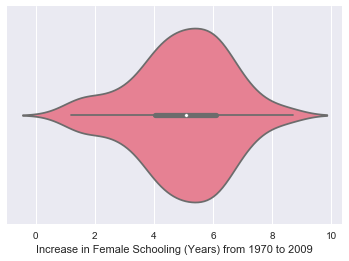

In [806]:
# Create new column of difference in mean years between 2009 and 1970
df_school['Diff'] = df_school["2009"] - df_school["1970"]

sns.violinplot(x='Diff', data=df_school)
plt.xlabel('Increase in Female Schooling (Years) from 1970 to 2009');

## 2. Female Literacy vs Mean Age at First Marriage
This analysis uses simple linear regression to investigate any trends between female literacy and age at first marriage in a country. Intuitively, we except an increase in mean age at first marriage in countries where female literacy is higher. 

Ideally, we want to compare changes in the relationship over years but due to unavailability of clean data for marraige age, the regression analysis is done using data only for 2005. Prior to analyzing specific metrics of the linear model, it helps you visualize the data. 

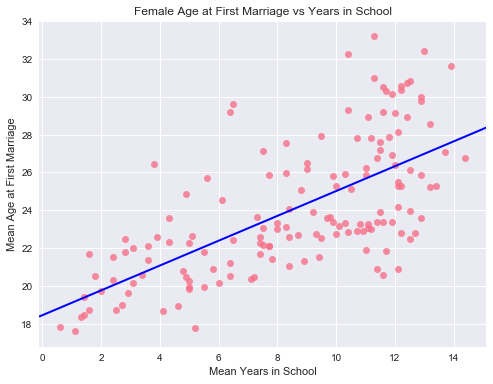

In [775]:
# Visualize marriage age vs years in school
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=df_2005["school_years"], y=df_2005["marriage_age"],ci=None, line_kws={"color":"b", "lw":2})

# Plot elements
plt.title('Female Age at First Marriage vs Years in School')
plt.xlabel('Mean Years in School')
plt.ylabel('Mean Age at First Marriage');

As expected, there is a relationship between education level and age at first marriage for females. To further examine this relationship quantitatively, a linear regression model is fitted to the data below. 

In [776]:
import statsmodels.api as sm;

# Add intercept and Fit linear model for school years
df_2005['intercept'] = 1
lm = sm.OLS(df_2005['marriage_age'], df_2005[['intercept', 'school_years']])
results = lm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           marriage_age   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           1.69e-20
Time:                        18:03:27   Log-Likelihood:                -358.55
No. Observations:                 150   AIC:                             721.1
Df Residuals:                     148   BIC:                             727.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       18.4580      0.560     32.975   

### Regression Interpretation
The output above looks intimidating to anyone without any background in statistics and linear regression models. Let's break down the most important aspects for our analysis. 

* **R-Squared**: Most people even vaguely familiar with linear regression have heard about R-squared. The R-squared is always between 0 and 100% and is a measure of how close the data are to the fitted line. Contrary to how widespread R-squared is, it is not as useful in indicating whether a model is a good fit. Although a high R-squared value is desired, a low R-squared does not mean the model is useless. 

* **Regression Coefficients (`coef(β)` )**: The two regression coefficients are `intercept` and `school_years` where the `intercept` value is almost always useless due to statistical reasons not necessary to dive deep into here. The coefficient for `school_years` is **0.6557** which means that for every extra year of education a female receives, on *average* the age at first marriage increases by 0.6557 years. 

* **P-value (`P>|t|`)**: Assuming that the null hypothesis is true, which in this analysis implies that the coefficient for `school_years` is actually 0 instead of 0.6557, p-value is the probability of how likely it is that we observe an effect equal to or greater than the effect observed in the analysis. Hence, a lower p-value is better implying that it is less likely that the observed effect is possible even if the actual value is 0. Thus, the p-value for `school_years` is extremely close to 0% which means `school_years` is a significant predictor in this model.  

* **Standard Error (`std err`)**: Standard error (S) is in the units of response variable (`marriage_age`) and is the average distance that the observed values fall from the regression line. In other words, it is a predictor of how wrong the regression model is on average. The value of S is 0.061 years which is a relatively low value for the purposes of our analysis as we're not interested in using the model for prediction purposes. 

There are many other parameters that can be analyzed for the model but the factors above are a solid starting point in interpreting the fit. 

### Female Literacy vs Marriage Age Conclusion
The goal of our analysis is to analyze the general trend between the variables instead of using it for predictive purposes. Based on this purpose, the linear model does a satisfactory job in highlighting how the marriage age of females aorund the world increases as they acquire more education. 

Education allows women to gain greater autonomy over marital decisions and the next analysis tries to investigate this further and see whether female labor engagement is affected by literacy and autonomy in society. 

## 3. Effect of Female Literacy and Autonomy on Female Labor Engagement in Society 
We saw how female literacy is related to higher female age at first marriage. The next question is to investigate whether female literacy and autonomy (age at first marriage) affect female labor participation in society. 


1. What factors affect the female labor participation in society, specifically, to what extent does female literacy and age at marriage impact female engagement in labor force? 

In [782]:
# Fit linear model 
lm = sm.OLS(df_2005['labor_participation'], df_2005[['intercept', 'school_years', 'marriage_age']])
results = lm.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     labor_participation   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                 -0.006
Method:                  Least Squares   F-statistic:                    0.5240
Date:                 Sat, 21 Jul 2018   Prob (F-statistic):              0.593
Time:                         20:21:11   Log-Likelihood:                -628.89
No. Observations:                  150   AIC:                             1264.
Df Residuals:                      147   BIC:                             1273.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       54.7728      9.839    

### Regression Interpretation
My intuition that the female labor participation increases as female education and autonomy in society increases is not supported by the linear model at all. A quick review of the model parameters highlights there is almost no correlation between labor participation and female education, marriage age. 

* **R-squared**: The R-squared value is 0.7% which suggests almost no correlation between the variables 
* **P-value**: The p-values for both predictors (`school_years, marriage_age`) is extremely high suggesting that the effects observed in our analysis have a probability of being due to chance. 

A scatterplot below of `school_years` versus `labor_participation` highlights the lacks of relationship and how some countries with extremely low education levels have some of the highest levels of female labor participation. 

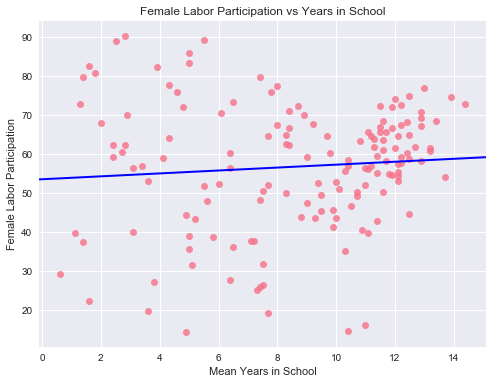

In [788]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=df_2005["school_years"], y=df_2005["labor_participation"],ci=None, line_kws={"color":"b", "lw":2})

# Plot elements
plt.title('Female Labor Participation vs Years in School')
plt.xlabel('Mean Years in School')
plt.ylabel('Female Labor Participation');

## 4. Effect of Female Literacy and Autonomy in Society on Child Mortality Rates
Research has shown how empowering women through education pays dividends by providing opportunities and choice to women and uplifts the health status of whole family. Our previous analysis showed how women's education is correlated with a higher age at marriage. 

Research has shown how females with higher education tend to have smaller families. The following studies on effects of gender inequality and female literacy on child mortality rates suggest we'd expect to see a decrease in mortality rates as women have greater education and autonomy in society. 
* [Association between gender inequality index and child mortality rates](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4353466/)
* [The Impact of Female Literacy on Infant Mortality Rate in Indian States](https://www.alliedacademies.org/articles/the-impact-of-female-literacy-on-infant-mortality-rate-in-indian-states.pdf)

### Choosing Predictors 
Both age at marriage and schooling years have been separately shown to be correlated with child mortality rates. 

With lack of research on effect of labor participation on child mortality rates, we look at a plot of `child_mortality` versus `labor_participation`. Based on the scatterplot below, no trend can be observed as child mortality is spread over all ranges of female labor participation. Hence, female labor participation in a society will not be included as a predictor in the multiple regression model. 

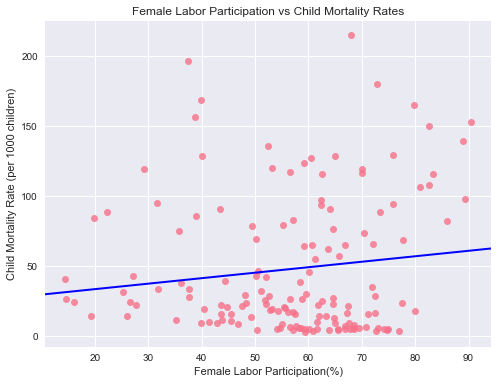

In [796]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x=df_2005["labor_participation"], y=df_2005["child_mortality"],ci=None, line_kws={"color":"b", "lw":2})

# Plot elements
plt.title('Female Labor Participation vs Child Mortality Rates')
plt.ylabel('Child Mortality Rate (per 1000 children)')
plt.xlabel('Female Labor Participation(%)');

In [798]:
# Fit linear model
lm = sm.OLS(df_2005['child_mortality'], df_2005[['intercept', 'school_years', 'marriage_age']])
results = lm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        child_mortality   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     149.8
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           3.34e-36
Time:                        13:36:58   Log-Likelihood:                -711.50
No. Observations:                 150   AIC:                             1429.
Df Residuals:                     147   BIC:                             1438.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      193.3387     17.065     11.329   

### Regression Results 
Child mortality rates are negatively associated with marriage age (`β = -2.8708; 95% CI [-4.585, -1.157]`) and schooling years (`β = -10.489; 95% CI [-10.660, -7.280]`). 

> For those unfamiliar with what `95% CI`:  The 95% Confidence Interval means that if we were to redo this study with different data samples many more times, the **true** value of the coefficient (which is unknown and we'll probably never know) would lie in confidence intervals in 95% of the studies. Example: If we repeat this study 20 times, the true value of coefficient `marriage_age` will lie in confidence intervals of 19 studies. 

Schooling years has a greater impact on the child mortality rates with a decrease of 10.489 child deaths on *average* for every extra year of female schooling. The age of marriage also lowers the mortality rates on average by 2.87 fewer deaths. 

### Model checking 
Multicollinearity is an issue that occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be *independent*. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

Based on our previous analysis of marriage age and schooling years, we know that the two predictors are correlated to an extent. Hence, we perform a test to identify the strength of that correlation and whether the model requires changes to mitigate multicollinearity effects. 

Variance inflation factor (VIF) is a test that identifies correlation between independent variables and the strenght of that correlation. VIFs start at 1 and have no upper limit. A value of 1 indicates that there is no correlation between this independent variable and any others. VIFs between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant corrective measures. VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable.

The following cells calculate the VIF for variables used in the previous model. 

In [799]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# get y and X dataframes based on regression:
y, X = dmatrices('child_mortality ~ school_years + marriage_age', df_2005, return_type='dataframe')

In [802]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print VIF 
vif.round(1)

,VIF Factor,features
0,55.5,Intercept
1,1.8,school_years
2,1.8,marriage_age


A value of 1.8 suggests that the extent of correlation between the predictors is not severe enough to warrant corrective measures. 

<a id='conclusions'></a>
## Conclusions

The different analyses performed provide the following insights: 
* The level of female education has improved all around the world between 1970 and 2005 with an average increase of 4 to 6 years of additional education in most countries. 
* Marriage age and female literacy are associated with an average increase of `0.6557 years (95% CI: [0.536, 0.775])` in age at first marriage for every extra year of education. 
* No corellations were observed between female literacy and autonomy on the labor participation of females in a society. 

### Limitations 
* The results of regression analysis are geared towards understanding the associations between the predictors and not to be used to accurate predictive purposes. 
* We cannot state that female autonomy and literacy **cause** lower child mortality rates as the data is obtained from observational studies. There are a multitude of factors that affect child mortality rates and the factors change depending on the region of the world and its social and economic norms. 

**We have observed statistically significant associations between female literacy, autonomy and child mortality rates. This suggests that initiatives to curtail child mortality rates should extent beyond providing better medical services and focus on prioritizing women's rights and autonomy in societies. Greater education for females provides greater autonomy over their decisions and focusing on social well being of females may augment the survival of children.**